Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE" and remove every line containing the expression: "raise ..." (if you leave such a line your code will not run).

## IMPORTANT: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebook!!!

Fill in your name and id number (numero matricola) below:

In [1]:
NAME = "Jacopo Andreoli"
ID_number = int("2011655")

import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

---

## HOMEWORK #3

### Non linear models for classification 

In this notebook we are going to explore the use of SVM and Neural Networks for image classification. We are going to use the famous MNIST dataset, that is a dataset of handwritten digits. We get the data from mldata.org, that is a public repository for machine learning data.

In [2]:
# Load the required packages
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

np.random.seed(ID_number)

In [3]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
## Load data from https://www.openml.org/d/554
X, Y = fetch_openml('mnist_784', version=1, return_X_y=True)

print(f'Each image is represented as vector of shape {X[0].shape}')
print(f'The image is represented in gray scale levels {X[0]}')
print(f'Here it is a label: {Y[0]}')

# Rescale the data
X = X / 255.

Each image is represented as vector of shape (784,)
The image is represented in gray scale levels [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.

In a classification problem it is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.
We can achieve this by setting the “stratify” argument of the function "train_test_split" to the Y component of our dataset.

We are going to use 500 samples in the train dataset, the remaining ones are used for testing.

In [4]:
from sklearn.model_selection import train_test_split

m_t = 500
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=m_t/len(Y), random_state=ID_number, stratify=Y)

print(f'Lenght train dataset: {len(y_train)}, Labels and frequencies: \n {list(zip(*np.unique(y_train, return_counts=True)))}')
print(f'Lenght test dataset: {len(y_test)}, Labels and frequencies: \n {list(zip(*np.unique(y_test, return_counts=True)))}')

Lenght train dataset: 500, Labels and frequencies: 
 [('0', 49), ('1', 56), ('2', 50), ('3', 51), ('4', 49), ('5', 45), ('6', 49), ('7', 52), ('8', 49), ('9', 50)]
Lenght test dataset: 69500, Labels and frequencies: 
 [('0', 6854), ('1', 7821), ('2', 6940), ('3', 7090), ('4', 6775), ('5', 6268), ('6', 6827), ('7', 7241), ('8', 6776), ('9', 6908)]


In [5]:
# Function to plot a digit and print the corresponding label
def plot_digit(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print(f"LABEL: {labels[index]}")
    return

INPUT:


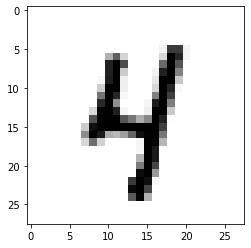

LABEL: 4
INPUT:


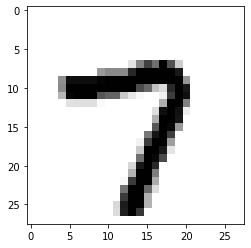

LABEL: 7


In [6]:
#let's try the plotting function
plot_digit(x_train, y_train, 100)
plot_digit(x_test, y_test, 40000)

## TO DO 1
SVM with cross validation to pick the best model. Use SVC from sklearn.svm and GridSearchCV from sklearn.model_selection (5-fold cross-validation).

Print the best parameters found as well as the best score obtained by the 'optimal' model.
Choose the grid, depending on the kernel you are using different hyper-parameters are needed (C, gamma, ...). 
You do not need to use more than 5 values for each hyper-parameter (otherwise the cell could be very slow). 

In [7]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV


def compute_best_SVM_with_CV(kernel_type : str, parameters : dict, x_train : np.ndarray, y_train : np.ndarray) -> tuple:
    '''
    Use Cross validation to find the best SVM on the given parameters. Return the best parameters set together with 
    the corresponding score. Return also the scores for all the other parameters given as input.
    :param kernel_type: Type of kernel (i.e. linear, rbf, poly)
    :param parameters: Dict containing kernel parameters (e.g. {'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001], ...})
    :param x_train: Train dataset
    :param y_train: Train labels
    
    :returns: (best_param, best_score, all_scores)
        WHERE:
        best_param: best parameter set (this is a dictionary)
        best_score: best score obtained for the given parameters (float)
        all_scores: all scores computed for each parameter (np.ndarray)
    '''
    SVM_model = SVC(kernel=kernel_type)
    # Use GridSearchCV to find the best parameter set.
    # YOUR CODE HERE
    gridsearch=GridSearchCV(SVM_model, parameters)
    gridsearch.fit(x_train, y_train)
    
    print('#####################################')
    print(f'RESULTS for {kernel_type} KERNEL\n')
    # Store the best parameters set and print them
    print("Best parameters set found:")
    best_param = gridsearch.best_params_
    # YOUR CODE HERE
    
    print(best_param)
    # Store and print the score of the best parameters set
    print("\nScore with best parameters:")
    best_score = gridsearch.best_score_
    # YOUR CODE HERE
    print(best_score)
    
    # Store and print all the scores for the given parameters (average of the validation scores)
    print("\nAll scores on the grid:")
    all_scores = gridsearch.cv_results_['mean_test_score']
    # YOUR CODE HERE
    print(all_scores)
    
    return best_param, best_score, all_scores

# Choose the grid for parameters of the linear SVM kernel
linear_parameters = {'C': [0.1, 0.01, 0.001, 0.0001]}
# YOUR CODE HERE

best_param_lin, best_score_lin, all_scores_lin = compute_best_SVM_with_CV('linear', linear_parameters, x_train, y_train)
# Choose the grid for parameters of the rbf SVM kernel
rbf_parameters =  {'C': [0.1, 1, 10, 100], 'gamma': [ 0.1, 0.01, 0.001]}
# YOUR CODE HERE

best_param_rbf, best_score_rbf, all_scores_rbf = compute_best_SVM_with_CV('rbf', rbf_parameters, x_train, y_train)
# Choose the grid for parameters of the poly SVM kernel (do not forget to choose the degree)
poly_parameters = {'C': [0.1, 0.01, 1, 10], 'gamma': [ 0.1, 0.01, 0.001], 'degree':[2, 3]}
# YOUR CODE HERE

best_param_poly, best_score_poly, all_scores_poly = compute_best_SVM_with_CV('poly', poly_parameters, x_train, y_train)

#####################################
RESULTS for linear KERNEL

Best parameters set found:
{'C': 0.1}

Score with best parameters:
0.8800000000000001

All scores on the grid:
[0.88  0.87  0.46  0.112]
#####################################
RESULTS for rbf KERNEL

Best parameters set found:
{'C': 1, 'gamma': 0.01}

Score with best parameters:
0.908

All scores on the grid:
[0.112 0.424 0.112 0.662 0.908 0.694 0.694 0.9   0.878 0.694 0.9   0.888]
#####################################
RESULTS for poly KERNEL

Best parameters set found:
{'C': 0.1, 'degree': 2, 'gamma': 0.1}

Score with best parameters:
0.876

All scores on the grid:
[0.876 0.334 0.112 0.83  0.222 0.112 0.838 0.112 0.112 0.816 0.112 0.112
 0.876 0.838 0.112 0.83  0.712 0.112 0.876 0.876 0.334 0.83  0.816 0.112]


In [8]:
assert type(best_param_rbf) == dict
assert type(best_score_rbf) == np.float64
assert np.prod(np.array([len(params) for params in rbf_parameters.values()])) == len(all_scores_rbf)


In [9]:
# TODO 2: 
# Get training and test error for the best SVM model obtained from CV (you need to choose across different kernels 
# too). You just need to look at the best model for each kernel and choose the best one (you can do this by hand).

best_kernel_type, best_parameters = 'rbf', best_param_rbf
# YOUR CODE HERE
best_SVM = SVC(kernel=best_kernel_type, **best_parameters)
best_SVM.fit(x_train, y_train)

# Compute training and test error for this model (use the usual sklearn built-in functions)
training_error, test_error = None, None
# YOUR CODE HERE
training_error, test_error = 1-best_SVM.score(x_train, y_train), 1-best_SVM.score(x_test, y_test)
print (f"Best SVM training error: {training_error}")
print (f"Best SVM test error: {test_error}")

Best SVM training error: 0.01200000000000001
Best SVM test error: 0.10923741007194243


In [10]:
assert type(training_error) == np.float64
assert type(test_error) == np.float64


### TO DO 3
Now we use feed-forward neural networks for classification. You can use the Multi-Layer-Perceptron (the multi-layer structure we have seen in class, see http://scikit-learn.org/stable/modules/neural_networks_supervised.html).

Note that we fix the starting random state so to make the runs reproducible. Use max_iter=1000, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1. Pick few architectures and use the default activation function (ReLU).

In [11]:
# test different architectures: 
# - 1 hidden layer with 10 nodes, 
# - 1 hidden layer with 50 nodes, 
# - 2 hidden layer with 10 nodes each, 
# - 2 hidden layer with 50 nodes each
# feel free to change this and test more/different structures

parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}

mlp = MLPClassifier(max_iter=1000, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID_number, learning_rate_init=.1)

# Use GridSearchCV to find the best mlp using 5 fold CV.
mlp_CV = None
# YOUR CODE HERE
gridsearch=GridSearchCV(mlp,parameters)
gridsearch.fit(x_train, y_train)
print('#####################################')
print ('RESULTS FOR NN\n')
# Store the best parameters set and print them
print("Best parameters set found:")
mlp_best_param = None
# YOUR CODE HERE
mlp_best_param = gridsearch.best_params_
print(mlp_best_param)

# Store and print the score of the best parameters set
print("\nScore with best parameters:")
mlp_best_score = None
# YOUR CODE HERE
mlp_best_score = gridsearch.best_score_
print(mlp_best_score)

# Store and print all the scores for the given parameters (average of the validation scores)
print("\nAll scores on the grid:")
mlp_all_scores = None
# YOUR CODE HERE
mlp_all_scores = gridsearch.cv_results_['mean_test_score']
print(mlp_all_scores)

#####################################
RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (50,)}

Score with best parameters:
0.8799999999999999

All scores on the grid:
[0.856 0.88  0.776 0.876]


In [12]:
assert type(mlp_best_param) == dict
assert type(mlp_best_score) == np.float64

## TO DO 4


Now get training and test error for a NN with best parameters from above. We use verbose=True
in input so to see how loss changes in iterations (see how this changes if the number of iterations is changed)

Iteration 1, loss = 2.31123323
Iteration 2, loss = 1.73865745
Iteration 3, loss = 1.11411477
Iteration 4, loss = 0.70762463
Iteration 5, loss = 0.47878920
Iteration 6, loss = 0.34671096
Iteration 7, loss = 0.28366425
Iteration 8, loss = 0.21704588
Iteration 9, loss = 0.16933019
Iteration 10, loss = 0.13235035
Iteration 11, loss = 0.10861523
Iteration 12, loss = 0.08548319
Iteration 13, loss = 0.06523811
Iteration 14, loss = 0.05373650
Iteration 15, loss = 0.04715694
Iteration 16, loss = 0.03827602
Iteration 17, loss = 0.03274718
Iteration 18, loss = 0.02927114
Iteration 19, loss = 0.02559452
Iteration 20, loss = 0.02307763
Iteration 21, loss = 0.02087065
Iteration 22, loss = 0.01917834
Iteration 23, loss = 0.01765580
Iteration 24, loss = 0.01646302
Iteration 25, loss = 0.01533447
Iteration 26, loss = 0.01457307
Iteration 27, loss = 0.01381444
Iteration 28, loss = 0.01291925
Iteration 29, loss = 0.01222897
Iteration 30, loss = 0.01170200
Iteration 31, loss = 0.01111921
Iteration 32, los

(Text(0.5, 0, 'Iter'), Text(0, 0.5, 'Loss'))

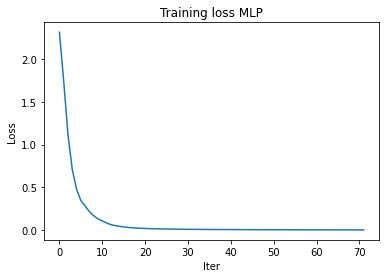

In [13]:
# Get training and test error for the best NN model from CV
max_iter = 1000
mlp = MLPClassifier(**mlp_best_param, max_iter=max_iter, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID_number,
                    learning_rate_init=.1, verbose=True)

# ADD CODE: FIT MODEL & COMPUTE TRAINING AND TEST ERRORS
training_error, test_error = None, None
mlp.fit(x_train, y_train)
training_error=1-mlp.score(x_train, y_train)
test_error=1-mlp.score(x_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

plt.plot(mlp.loss_curve_, label='Training Loss')
plt.title('Training loss MLP')
plt.xlabel('Iter'), plt.ylabel('Loss')

In [14]:
assert type(training_error) == np.float64
assert type(test_error) == np.float64


## TO DO  5
Write a function to find and plot the first digit (in x_test) that is missclassified by NN and correctly classified by SVM.

Write a function to compute the confusion matrix for the predictions of a model (on testset). If you are not familiar with what a confusion matrix is, have a look at this link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html . You are not allowed to use sklearn to create the confusion matrix BUT you can compare your solution with the sklearn implementation to check you wrote it right (see assert checks). 

SVM confusion matrix: [[6487    1   25   19   16  130  107    7   61    1]
 [   0 7691   24   24    8   14   17   15   25    3]
 [  64  148 6018  218   96   38  102  149   74   33]
 [  41   84  176 6095    6  348   56   92  130   62]
 [  11   62   68    2 6220   26   39   21   43  283]
 [  54  119   35  260   52 5396  150   24   78  100]
 [  57   81   74    6   61  118 6390    4   31    5]
 [  28  158  146   19  143   34    1 6426   12  274]
 [  52  284  231  300   66  207   52   29 5390  165]
 [  51  101   45   99  465   60    5  249   38 5795]]
MLP confusion matrix: [[6344    0   72   46   24  118  158   10   73    9]
 [   0 7596   24   51   11   15   28   26   68    2]
 [  56   89 5877  257  127   18  153  214   93   56]
 [  30   45  252 5953    9  394  116   92  113   86]
 [  36   46   73   18 6228   40   56   16   34  228]
 [ 140  145   72  369  103 4632  251   77  322  157]
 [  72   55   83    3  213   56 6265    4   75    1]
 [  51   86  172  151  173   55    3 6357   23  170]
 

(Text(0.5, 1.0, 'SVM'), Text(0.5, 1.0, 'MLP'))

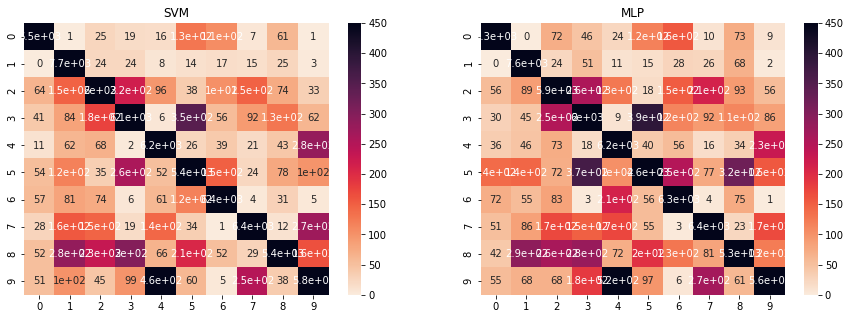

In [15]:
def find_and_print_first_mismatched_prediction(SVM_prediction : np.ndarray, NN_prediction : np.ndarray,
                                               x_test : np.ndarray, y_test : np.ndarray) -> int:
    '''
    Function to find and print the first digit that is missclassified by NN and correctly classified by SVM.
    :param SVM_prediction: SVM predicitons.
    :param NN_prediction: MLP predicitons.
    :param x_test: Test set inputs.
    :param y_test: Test set labels.
    
    :returns:
        i: returns the first index in which there is a mismatch between NN_prediction and true labels but no mismatch 
           between SVM_prediction and true labels. 
    '''
    i = 0
    found = False
    while ((not found) and (i<len(y_test))):
        # YOUR CODE HERE
        
        
        if( SVM_prediction[i] == y_test[i] and y_test[i] != NN_prediction[i]) : 
            i-= 1
            found = True
            
        i+= 1
        
    return i
    
    
def confusion_matrix_by_hand(true_labels : np.ndarray, predicted_labels : np.ndarray) -> np.ndarray:
    '''
    Function used to compute the confusion matrix given true and predicted labels. 
    :param true_labels: True labels.
    :param predicted_labels: Predicted labels (note this function does not require to know which model generated 
                             the predictions).
    
    :returns:
        confusion_matrix: Confusion matrix for the given true and predicted labels.
    '''
    labels = np.unique(true_labels)
    map_labels_to_index = {label:i for i, label in enumerate(labels)}
    confusion_matrix = np.zeros((len(labels), len(labels)))
    # YOUR CODE HERE
    
    for i in map_labels_to_index.keys() :
        
        for j in map_labels_to_index.keys() :
            
            for l in range(len(true_labels)):
                
                if(true_labels[l] == i and predicted_labels[l] == j) : 
                    
                    confusion_matrix[map_labels_to_index[i]][map_labels_to_index[j]] += 1
    
    return confusion_matrix.astype(int)


# Let's test our functions
SVM_prediction = best_SVM.predict(x_test)
NN_prediction = mlp.predict(x_test)

first_index = find_and_print_first_mismatched_prediction(SVM_prediction, NN_prediction, x_test, y_test)

SVM_CM = confusion_matrix_by_hand(y_test, SVM_prediction)
MLP_CM = confusion_matrix_by_hand(y_test, NN_prediction)

print(f'SVM confusion matrix: {SVM_CM}')
print(f'MLP confusion matrix: {MLP_CM}')

# Convert confusion matrices to pandas data frames
labels = np.unique(y_test)
SVM_CM_df = pd.DataFrame(SVM_CM, index = labels, columns = labels)
MLP_CM_df = pd.DataFrame(MLP_CM, index = labels, columns = labels)

# Plot confusion matrices
fig, axes = plt.subplots(1,2, figsize=(15,5))
sn.heatmap(SVM_CM_df, annot=True, ax=axes[0], cmap='rocket_r', vmax=450)
sn.heatmap(MLP_CM_df, annot=True, ax=axes[1], cmap='rocket_r', vmax=450)
axes[0].set_title('SVM'), axes[1].set_title('MLP')

In [16]:
from sklearn.metrics import confusion_matrix
skl_confusion_matrix_SVM = confusion_matrix(y_test, SVM_prediction)
skl_confusion_matrix_NN = confusion_matrix(y_test, NN_prediction)

assert np.sum(skl_confusion_matrix_SVM - SVM_CM) == 0
assert np.sum(skl_confusion_matrix_NN - MLP_CM) == 0


## TO DO 6: explain the results you got (max 5 lines)
According to the cross-validation results, would you choose SVMs or NNs when 500 data points are available for training? Is this a good choice, given the results on the test set?

Looking at the confusion matrices what to do you observe? On which classes each model is more likely to make mistakes? 

(Answer in the next cell, no need to add code)

In [17]:
# YOUR CODE HERE

# According to the best score found for rbf SVM and from the result on the test dataset for the neural network(50,1), we observe
# that we achieve the best performance with the SVM and at the same time that the neural network overfit (due to its
# high complexity). In the comparison of the two confusion matrices we can observe that, for the rbf SVM classifier, the 
# overall amount of prediction error is smaller than those given by the Neural Network. We can see also that both of them have 
# a lot to difficultes to recognize the numbers '8' and '9'.

## More Data

Now let's do the same but using more data points for training SVM and NN. For SVM we are going to use the best hyperparameters set (kernel, C, gamma, ...) found using 500 data points. For NNs we use the same best architecture as before, but you can try more if you want! 

In [18]:
#let restart the random generator with the given seed
np.random.seed(ID_number)

m_t = 60000
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=m_t/len(Y), random_state=ID_number, stratify=Y)

print(f'Lenght train dataset: {len(y_train)}, Labels and frequencies: \n {list(zip(*np.unique(y_train, return_counts=True)))}')
print(f'Lenght test dataset: {len(y_test)}, Labels and frequencies: \n {list(zip(*np.unique(y_test, return_counts=True)))}')

Lenght train dataset: 60000, Labels and frequencies: 
 [('0', 5917), ('1', 6752), ('2', 5991), ('3', 6121), ('4', 5849), ('5', 5411), ('6', 5894), ('7', 6251), ('8', 5850), ('9', 5964)]
Lenght test dataset: 10000, Labels and frequencies: 
 [('0', 986), ('1', 1125), ('2', 999), ('3', 1020), ('4', 975), ('5', 902), ('6', 982), ('7', 1042), ('8', 975), ('9', 994)]


In [25]:
# As we did with the first HW let's use a decorator to measure time 
from collections import defaultdict
running_times = defaultdict(list)

def measure_time(function):
    def wrap(*args, **kw):
        import time 
        t_start = time.time()
        result = function(*args, **kw)
        t_end = time.time()
        running_times[type(args[0]).__name__].append(t_end - t_start)
        return result
    return wrap

@measure_time
def fit_classification_model(model, x_train, y_train):
    model.fit(x_train, y_train)

In [26]:
n_data = [250, 500, 1000, 2000, 5000, 7500]
svm_train_err, svm_test_err = [], [] 
mlp_train_err, mlp_test_err = [], [] 
for n in n_data: 
    print(f'Processing with {n} data ...')
    # Initialize models according to the best we got using 500 data
    svm = SVC(kernel=best_kernel_type, **best_parameters)
    mlp = MLPClassifier(**mlp_best_param, max_iter=max_iter, alpha=1e-4, solver='sgd', tol=1e-4, 
                        random_state=ID_number, learning_rate_init=.1)
    
    # fit svc
    fit_classification_model(svm, x_train[:n], y_train[:n])
    # get svc train and test error
    svm_train_err.append(1. - svm.score(x_train[:n], y_train[:n]))
    svm_test_err.append(1. - svm.score(x_test, y_test))
    
    # fit mlp
    fit_classification_model(mlp, x_train[:n], y_train[:n])
    # get mlp train and test error
    mlp_train_err.append(1. - mlp.score(x_train[:n], y_train[:n]))
    mlp_test_err.append(1. - mlp.score(x_test, y_test))

Processing with 250 data ...
Processing with 500 data ...
Processing with 1000 data ...
Processing with 2000 data ...
Processing with 5000 data ...
Processing with 7500 data ...


(<matplotlib.legend.Legend at 0x1a05cae4a90>, Text(0.5, 1.0, 'Training Time'))

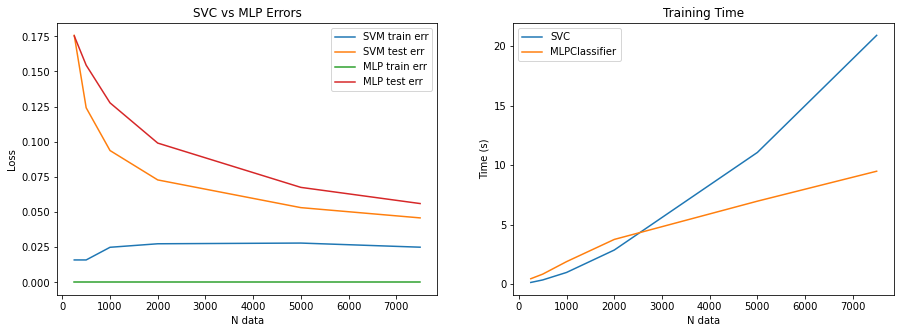

In [27]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))
axes[0].plot(n_data, np.array(svm_train_err), label='SVM train err')
axes[0].plot(n_data, np.array(svm_test_err), label='SVM test err')
axes[0].plot(n_data, np.array(mlp_train_err), label='MLP train err')
axes[0].plot(n_data, np.array(mlp_test_err), label='MLP test err')
axes[0].set_xlabel('N data'), axes[0].set_ylabel('Loss')
axes[0].legend(), axes[0].set_title('SVC vs MLP Errors')

for model, times in running_times.items():
    axes[1].plot(n_data, times, label=model)
axes[1].set_xlabel('N data'), axes[1].set_ylabel('Time (s)')
axes[1].legend(), axes[1].set_title('Training Time')

# TODO 7: Complete dataset
Just for comparison, since it may not be possible to learn a SVM on too many data (due to time and memory complexity issues, see previous plots), let's use logistic regression (with standard parameters from scikit-learn but the number of iteration).

In [28]:
from sklearn import linear_model

# Fit and test a logistic regression model
max_iter = 1000
log_reg = None
training_error, test_error = None, None
# YOUR CODE HERE

log_reg = linear_model.LogisticRegression(max_iter = 1000)
log_reg.fit(x_train, y_train)

training_error_lr = 1 - log_reg.score(x_train, y_train)
test_error_lr = 1- log_reg.score(x_test, y_test)

print (f"Best logistic regression training error: {training_error_lr:.4f}")
print (f"Best logistic regression test error: {test_error_lr:.4f}")

Best logistic regression training error: 0.0608
Best logistic regression test error: 0.0789


We now learn the NN. Below we use the same best architecture as before (found with 500 data), feel free to try larger ones (and to use again CV), or smaller ones if it takes too much time. (We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration). 

*Note*: If you do again CV to choose the best architecture remember to save the best set of parameters into the variable: "mlp_best_param".

In [29]:
#get training and test error for the best NN model from CV
best_mlp_large = None
training_error, test_error = None, None
# YOUR CODE HERE

max_iter = 1000
mlp = MLPClassifier(**mlp_best_param, max_iter=max_iter, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID_number,
                    learning_rate_init=.1, verbose=True)

mlp.fit(x_train, y_train)


training_error = 1 - mlp.score(x_train, y_train)
test_error = 1 - mlp.score(x_test, y_test)



print ('\nRESULTS FOR BEST NN\n')

print (f"Best NN training error: {training_error:.4f}")
print (f"Best NN test error: {test_error:.4f}")

Iteration 1, loss = 0.31852538
Iteration 2, loss = 0.14361837
Iteration 3, loss = 0.11088001
Iteration 4, loss = 0.09257124
Iteration 5, loss = 0.08015320
Iteration 6, loss = 0.07027382
Iteration 7, loss = 0.06575618
Iteration 8, loss = 0.05828754
Iteration 9, loss = 0.05387261
Iteration 10, loss = 0.04900516
Iteration 11, loss = 0.04581019
Iteration 12, loss = 0.04230996
Iteration 13, loss = 0.03878718
Iteration 14, loss = 0.03520677
Iteration 15, loss = 0.03230612
Iteration 16, loss = 0.03009884
Iteration 17, loss = 0.02693612
Iteration 18, loss = 0.02420119
Iteration 19, loss = 0.02320599
Iteration 20, loss = 0.02051822
Iteration 21, loss = 0.01943713
Iteration 22, loss = 0.01838397
Iteration 23, loss = 0.01726038
Iteration 24, loss = 0.01698236
Iteration 25, loss = 0.01405467
Iteration 26, loss = 0.01386243
Iteration 27, loss = 0.01174872
Iteration 28, loss = 0.01001958
Iteration 29, loss = 0.00770841
Iteration 30, loss = 0.00759562
Iteration 31, loss = 0.00659677
Iteration 32, los

In [30]:
assert type(training_error) == np.float64
assert type(test_error) == np.float64


(Text(0.5, 1.0, 'MLP Train'), Text(0.5, 1.0, 'MLP Test'))

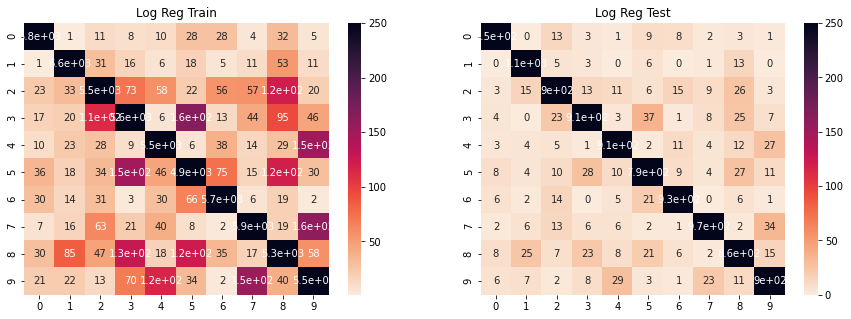

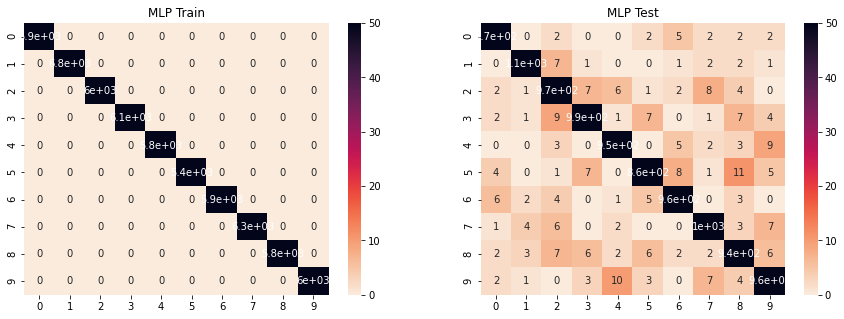

In [31]:
## TODO 8: compute the confusion matrices both on train and test set for Logistic regression (trained on 60k)
# and MLP (trained on 60k).

# Log Reg Confusion matrices
log_reg_CM_train, log_reg_CM_test = None, None
# YOUR CODE HERE

predicted_train_log_reg = log_reg.predict(x_train)
predicted_test_log_reg = log_reg.predict(x_test)

log_reg_CM_train = confusion_matrix_by_hand(y_train , predicted_train_log_reg)

log_reg_CM_test = confusion_matrix_by_hand(y_test , predicted_test_log_reg)

# mlp
mlp_CM_train, mlp_CM_test = None, None
# YOUR CODE HERE

predicted_train_mlp = mlp.predict(x_train)
predicted_test_mlp = mlp.predict(x_test)

mlp_CM_train = confusion_matrix_by_hand(y_train , predicted_train_mlp)

mlp_CM_test = confusion_matrix_by_hand(y_test , predicted_test_mlp)


# Convert confusion matrices to pandas data frames
labels = np.unique(y_test)
log_reg_CM_train_df = pd.DataFrame(log_reg_CM_train, index = labels, columns = labels)
log_reg_CM_test_df = pd.DataFrame(log_reg_CM_test, index = labels, columns = labels)

mlp_CM_train_df = pd.DataFrame(mlp_CM_train, index = labels, columns = labels)
mlp_CM_test_df = pd.DataFrame(mlp_CM_test, index = labels, columns = labels)

# Plot confusion matrices
fig, axes = plt.subplots(1,2, figsize=(15,5))
sn.heatmap(log_reg_CM_train_df, annot=True, ax=axes[0], cmap='rocket_r', vmax=250)
sn.heatmap(log_reg_CM_test_df, annot=True, ax=axes[1], cmap='rocket_r', vmax=250)
axes[0].set_title('Log Reg Train'), axes[1].set_title('Log Reg Test')

fig, axes = plt.subplots(1,2, figsize=(15,5))
sn.heatmap(mlp_CM_train_df, annot=True, ax=axes[0], cmap='rocket_r', vmax=50)
sn.heatmap(mlp_CM_test_df, annot=True, ax=axes[1], cmap='rocket_r', vmax=50)
axes[0].set_title('MLP Train'), axes[1].set_title('MLP Test')

In [32]:
assert log_reg_CM_train.shape == (10, 10)
assert log_reg_CM_test.shape == (10, 10)
assert mlp_CM_train.shape == (10, 10)
assert mlp_CM_test.shape == (10, 10)


## TO DO 9
Compare and discuss:
- compare the computational time required to fit a SVM and a MLP. Which is faster as the number of data increase? Why? Can you apply both methods in the high data regime?
- the results from SVM m=7500 and NN with m=60000 training data points.
- the results from NN with m=500 and m=60000 training data points.
- What do you observe in the confusion matrices? Which are the hardest classes? Are the hardest and easiest classes the same both for mlp and logistic regression?

(Answer in the next cell, no need to write code)

In [33]:
# YOUR CODE HERE

# From the diagrams above, we can see that the faster classifier is given by the MLP. it use an SGD algorithm to optimize and 
# seems to induce a time linear function wrt data. On the other hand The SVM must evaluate the non-linear kernel function on 
# all the original data before performing the optimization; the training time seems to grow like a quadratic function. this
# analysis suggest us that With high data regime,the most reasonable choiche is the MLP. From the comparison of SVM (7500 data) 
# and MLP(60000 data) we observe that the second can achieve better performance; this is due to the number of data used for
# training. Focusing on the MLP with 60000 and 500 data we can derive something similar, because more data allow the MLP to
# achieve better perfomance and prevent overfitting (that we saw with 500 data). From the confusion matrices We can see that MLP
# and SVM have the same hardest classes as before, that correspond to numbers '8','9'; this is true also for the easiest class,
# that is '0'. We can observe that both model share difficultes to recognize the same numbers, often giving them the same wrong prediction